# Dependecias


In [5]:
import seaborn as sns
from sentence_transformers import SentenceTransformer
sns.set_theme()
import sys
import os
ruta_carpeta = os.path.abspath('../src')
if ruta_carpeta not in sys.path:
    sys.path.append(ruta_carpeta)
import utileria as ut
from Graficos import graficos
from limpieza import limpieza_regex 
import pandas as pd

# lectura de datos

In [6]:
datos = pd.read_csv('../input/datos_taxi.csv')

In [7]:
datos_analisis=datos.iloc[:,39:41]
datos_analisis.columns = ['factores_adicionales','implementacion']

In [8]:
datos_respuesta = datos_analisis.loc[datos_analisis['factores_adicionales'].isnull()==False].reset_index()

In [9]:
datos_respuesta.drop(columns=['index'],inplace=True)
datos_respuesta['factores_adicionales'] = limpieza_regex.limpieza_de_textos(list(datos_respuesta['factores_adicionales']))

In [10]:
# variables datos que no usare
patron = r'^(?:nada|ninguno|ninguna|na|n\.a|n|no|\.{1,3}|\-|:|\?|nqda|na\s*)$'

In [11]:
datos_use = datos_respuesta.loc[~datos_respuesta['factores_adicionales'].str.match(patron, na=False)]

In [12]:
datos_use['implementacion'].unique()

array(['Muy en desacuerdo', 'Desacuerdo', 'Deacuerdo', 'Muy deacuerdo'],
      dtype=object)

In [13]:
datos_acu = datos_use.loc[(datos_use['implementacion']=='Deacuerdo')|(datos_use['implementacion'] == 'Muy deacuerdo')]
datos_noa = datos_use.loc[(datos_use['implementacion']=='Desacuerdo')|(datos_use['implementacion'] == 'Muy en desacuerdo')]

In [14]:
print(datos_noa.shape,datos_acu.shape)

(223, 2) (286, 2)


# nubes de palabras 

In [15]:
with open('../input/palabras_vacias.txt', 'r') as file:
    data = file.read().splitlines()

In [16]:
textos_acu = limpieza_regex.stop_words(data,list(datos_acu['factores_adicionales']))
textos_noa = limpieza_regex.stop_words(data,list(datos_noa['factores_adicionales']))


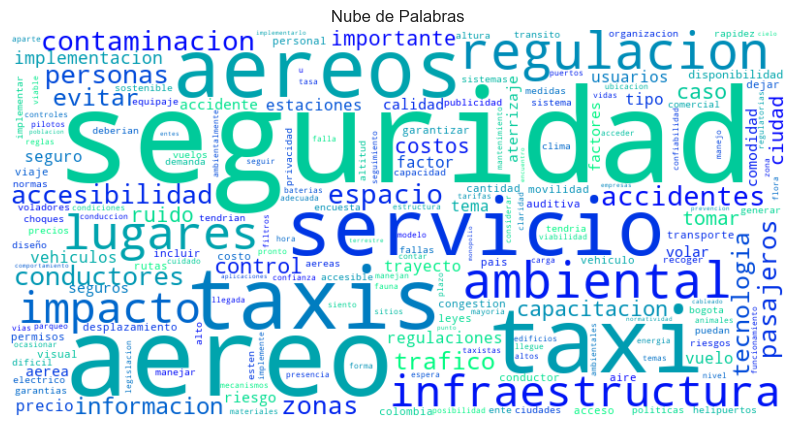

In [17]:
graficos.generar_wordcloud(textos_acu,"winter")

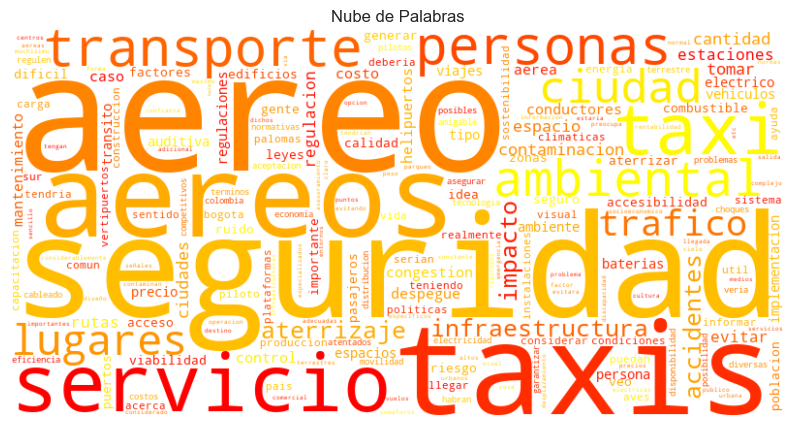

In [18]:
graficos.generar_wordcloud(textos_noa,"autumn")

# Cercania semantica

In [19]:
textos = list(filter(None,list(datos_use['factores_adicionales'])))

In [21]:
textos

['huella ambiental proceso de produccion',
 'la energia que estos consumiran los lugares donde habran puertos la complejidad de asegurar que los pilotos sean de calidad',
 'las politicas de seguridad en transporte y movilidad en colombia',
 'politicas de seguridad para el usuario',
 'deberian tomar en cuenta una altitud minima a la hora de volar teniendo en cuenta que en ciertas zonas de la ciudad los edificios pasan de los pisos',
 'garantizar la seguridad mediante torres de control y nsvegacion asistida por la aerocivil',
 'accesibilidad',
 'las rutas aereas que no interfieran con nos vuelos tradicionales ni la infraestructura regulacion clara',
 'ya lo mencionan pero recalco las leyes reguladoras',
 'se deberia tener muy en cuenta la contaminacion visual y auditiva',
 'a que altitud volarian estos taxis pues en la ciudad hay bastante presencia de puentes vehiculares y peatonales y cables de energia que pueden impedir su desplazamiento',
 'el impacto que puede tener contra animales e

In [22]:
text_comp_acu = list(datos_acu['factores_adicionales'])
text_comp_noa = list(datos_noa['factores_adicionales'])

In [23]:
model = SentenceTransformer('hackathon-pln-es/paraphrase-spanish-distilroberta')
modelos = ut.sentence_similarity(model,textos,0.95)

print(len(modelos.varianza_explicada()))


110


c:\Users\bcriv\miniconda3\envs\dydde\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\bcriv\miniconda3\envs\dydde\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\bcriv\miniconda3\envs\dydde\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\bcriv\miniconda3\envs\dydde\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

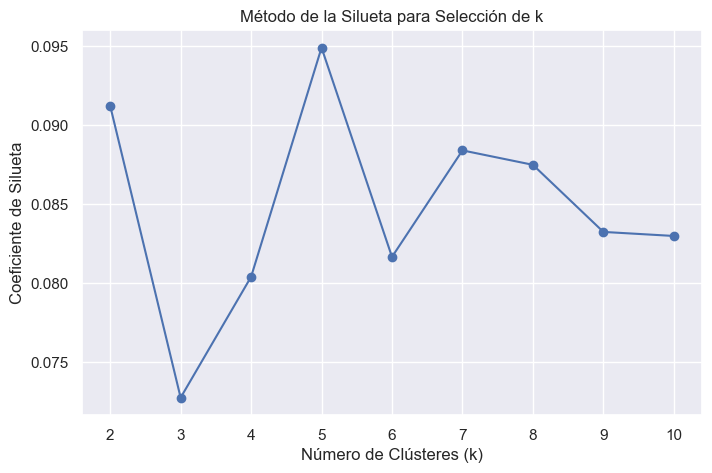

In [25]:
modelos.silhouette_method()

In [26]:
cluster = modelos.k_means(5)
len(cluster.labels_)

c:\Users\bcriv\miniconda3\envs\dydde\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


472

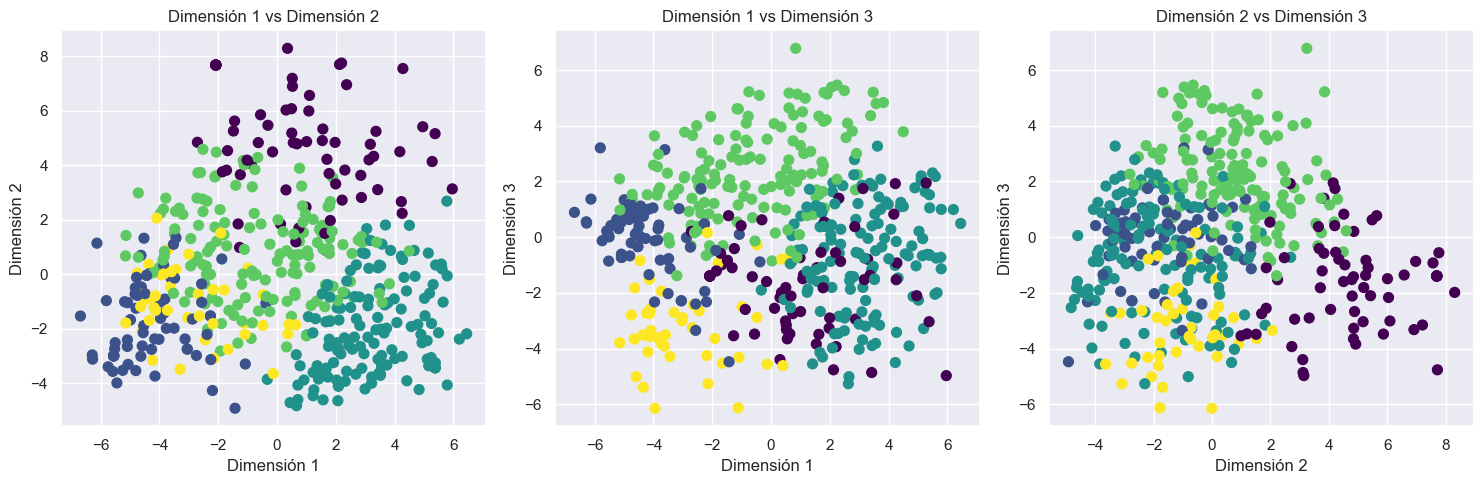

In [27]:
graficos.plot_column_combinations(modelos.componentes(),3, cluster.labels_)

In [28]:
data_use = datos_use.loc[datos_use['factores_adicionales']!= '']
data_use['grupo'] = cluster.labels_

C:\Users\bcriv\AppData\Local\Temp\ipykernel_20992\1575344253.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_use['grupo'] = cluster.labels_


In [29]:
data_use

,factores_adicionales,implementacion,grupo
1,huella ambiental proceso de produccion,Muy en desacuerdo,4
2,la energia que estos consumiran los lugares do...,Desacuerdo,2
3,las politicas de seguridad en transporte y mov...,Desacuerdo,3
4,politicas de seguridad para el usuario,Desacuerdo,0
5,deberian tomar en cuenta una altitud minima a ...,Deacuerdo,2
...,...,...,...
608,que tan comun es encontrar uno de los puertos ...,Muy en desacuerdo,3
609,la correcta capacitacion del piloto,Deacuerdo,2
610,identificar y construir infraestructuras adecu...,Muy en desacuerdo,2
611,la correcta revision de los entes correspondie...,Muy deacuerdo,0


# nube de palabras por grupo

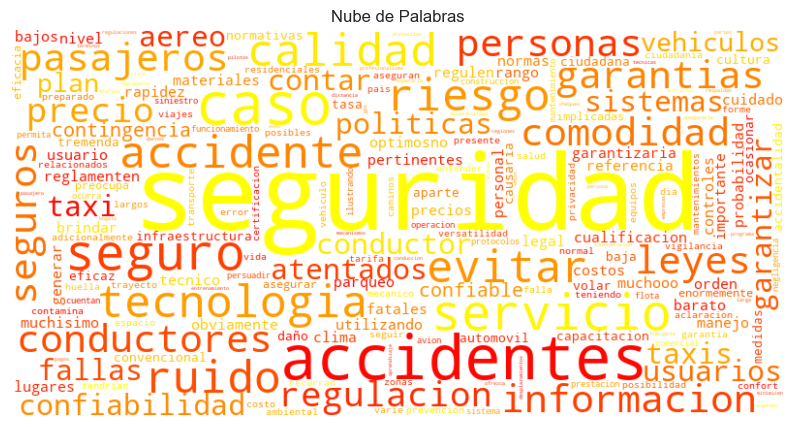

In [30]:
graficos.generar_wordcloud(limpieza_regex.stop_words(data,data_use[data_use['grupo']==0]['factores_adicionales']),"autumn")

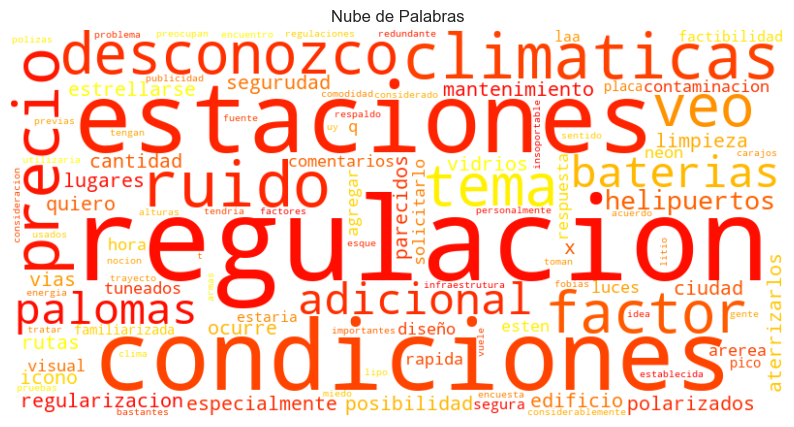

In [31]:
graficos.generar_wordcloud(limpieza_regex.stop_words(data,data_use[data_use['grupo']==1]['factores_adicionales']),"autumn")

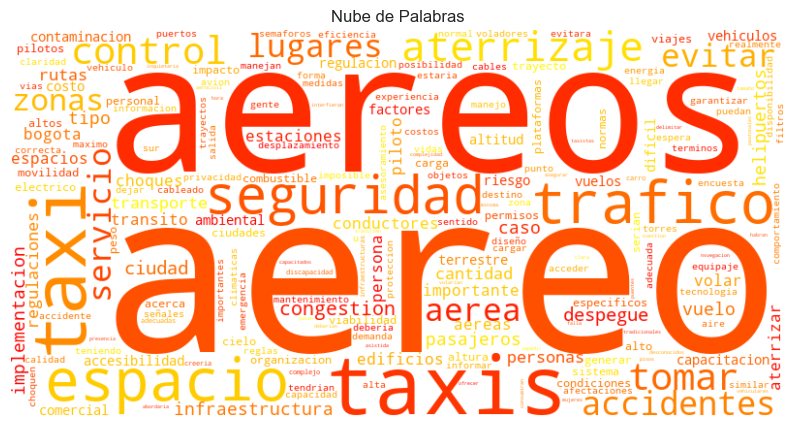

In [32]:
graficos.generar_wordcloud(limpieza_regex.stop_words(data,data_use[data_use['grupo']==2]['factores_adicionales']),"autumn")

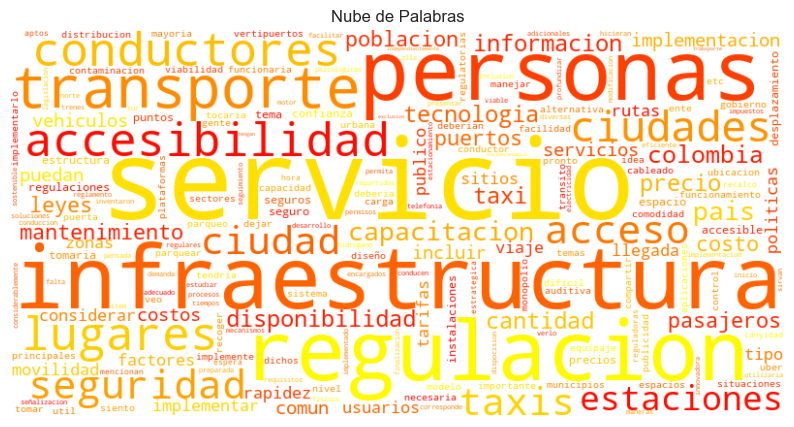

In [33]:
graficos.generar_wordcloud(limpieza_regex.stop_words(data,data_use[data_use['grupo']==3]['factores_adicionales']),"autumn")

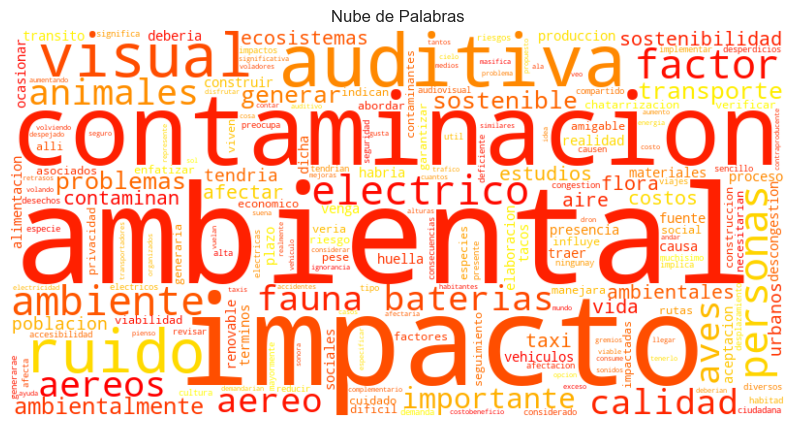

In [35]:
graficos.generar_wordcloud(limpieza_regex.stop_words(data,data_use[data_use['grupo']==4]['factores_adicionales']),"autumn")